# Implemetation of Simple Linear Regression using Scikit-Learn
 #### Step 1: Importing libraries and loading a .csv file

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("G11_prices.csv")

In [3]:
df

,area,bedrooms,age,price
0,1125,4,2,2.80
1,1000,3,2,2.30
2,1575,5,5,3.15
3,1125,5,1,2.92
4,900,4,8,1.85
5,1125,5,3,2.85
6,1125,4,7,1.60
7,1125,4,5,2.10
8,1800,5,4,3.00
9,4500,8,3,7.00


In [4]:
df.info

<bound method DataFrame.info of     area  bedrooms  age  price
0   1125         4    2   2.80
1   1000         3    2   2.30
2   1575         5    5   3.15
3   1125         5    1   2.92
4    900         4    8   1.85
5   1125         5    3   2.85
6   1125         4    7   1.60
7   1125         4    5   2.10
8   1800         5    4   3.00
9   4500         8    3   7.00
10  1800         5    4   2.80
11  3204         6    3   5.60
12  3204         6    3   5.96
13  1575         6    3   3.40
14  1800         5    5   3.25
15  1800         5    5   3.30
16  1250         4    2   2.10
17  4950         9    4   7.10
18   900         4    8   1.68>

#### Step 2: Finding a correlation

In [5]:
corr = df.corr()

In [6]:
print(corr)

              area  bedrooms       age     price
area      1.000000  0.928692 -0.203855  0.968575
bedrooms  0.928692  1.000000 -0.195161  0.914198
age      -0.203855 -0.195161  1.000000 -0.337718
price     0.968575  0.914198 -0.337718  1.000000


In [7]:
print(corr)

              area  bedrooms       age     price
area      1.000000  0.928692 -0.203855  0.968575
bedrooms  0.928692  1.000000 -0.195161  0.914198
age      -0.203855 -0.195161  1.000000 -0.337718
price     0.968575  0.914198 -0.337718  1.000000


#### Step 3: Plotting a heatmap

In [8]:
import seaborn as sns

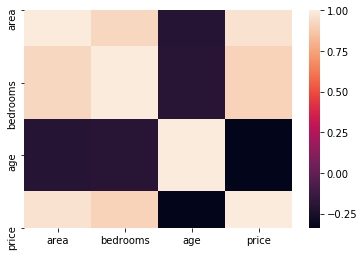

In [9]:
sns.heatmap(corr)

#### Step 4: Testing & training

In [10]:
import sklearn as sk
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [11]:
train,test = train_test_split(df, test_size = 0.2, random_state = 42, shuffle = True)

In [12]:
train

,area,bedrooms,age,price
8,1800,5,4,3.00
16,1250,4,2,2.10
3,1125,5,1,2.92
13,1575,6,3,3.40
15,1800,5,5,3.30
17,4950,9,4,7.10
2,1575,5,5,3.15
9,4500,8,3,7.00
18,900,4,8,1.68
4,900,4,8,1.85


In [13]:
test

,area,bedrooms,age,price
0,1125,4,2,2.80
5,1125,5,3,2.85
11,3204,6,3,5.60
1,1000,3,2,2.30


In [14]:
train.shape

(15, 4)

In [15]:
test.shape

(4, 4)

In [16]:
xtrain = train[['area', 'bedrooms', 'age']]

In [17]:
xtrain

,area,bedrooms,age
8,1800,5,4
16,1250,4,2
3,1125,5,1
13,1575,6,3
15,1800,5,5
17,4950,9,4
2,1575,5,5
9,4500,8,3
18,900,4,8
4,900,4,8


In [18]:
ytrain = train[['price']]

In [19]:
ytrain

,price
8,3.00
16,2.10
3,2.92
13,3.40
15,3.30
17,7.10
2,3.15
9,7.00
18,1.68
4,1.85


In [20]:
print(xtrain)

    area  bedrooms  age
8   1800         5    4
16  1250         4    2
3   1125         5    1
13  1575         6    3
15  1800         5    5
17  4950         9    4
2   1575         5    5
9   4500         8    3
18   900         4    8
4    900         4    8
12  3204         6    3
7   1125         4    5
10  1800         5    4
14  1800         5    5
6   1125         4    7


In [21]:
print(ytrain)

    price
8    3.00
16   2.10
3    2.92
13   3.40
15   3.30
17   7.10
2    3.15
9    7.00
18   1.68
4    1.85
12   5.96
7    2.10
10   2.80
14   3.25
6    1.60


In [22]:
xtest = test[['area', 'bedrooms', 'age']]

In [23]:
ytest = test[['price']]

In [24]:
print(xtest)

    area  bedrooms  age
0   1125         4    2
5   1125         5    3
11  3204         6    3
1   1000         3    2


In [25]:
print(ytest)

    price
0    2.80
5    2.85
11   5.60
1    2.30


#### Step 5: Creating a linear regression model and fit it in with existing data

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()

In [28]:
model.fit(xtrain, ytrain)

LinearRegression()

In [29]:
predicted = model.predict(xtest)

In [30]:
predicted

array([[2.47215548],
       [2.5529381 ],
       [5.11304808],
       [2.14930398]])

In [31]:
ytest

,price
0,2.80
5,2.85
11,5.60
1,2.30


In [32]:
from sklearn.metrics import mean_absolute_error

In [33]:
mean_absolute_error(ytest, predicted)

0.31563859143016615

In [34]:
import matplotlib.pyplot as plt

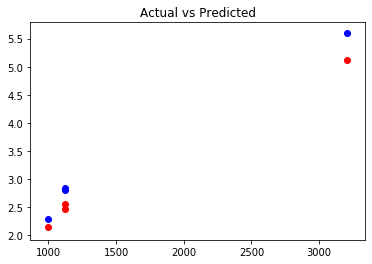

In [35]:
plt.scatter(xtest.area, ytest, color = "blue")
plt.scatter(xtest.area, predicted, color = "red")
plt.title("Actual vs Predicted")
plt.show()